In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
trainVar_df = pd.read_csv('Data/training_variants')
testVar_df = pd.read_csv('Data/test_variants')
trainVar_df.head(15)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


In [3]:
trainText_df = pd.read_csv('Data/training_text', sep = '\|\|', header = None, skiprows = 1, names = ['ID', 'Text'], engine = 'python')
testText_df = pd.read_csv('Data/test_text', sep = '\|\|', header = None, skiprows = 1, names = ['ID', 'Text'], engine = 'python')
trainText_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### Merging the Text with the variables into one dataframe

In [4]:
train_df = pd.merge(trainVar_df, trainText_df, how = 'left', on = 'ID').set_index('ID')
test_df = pd.merge(testVar_df, testText_df, how = 'left', on = 'ID').set_index('ID')
train_df.head(15)

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...


### Analysing the data

In [5]:
train_df.describe(include = 'all')

,Gene,Variation,Class,Text
count,3321,3321,3321.000000,3316
unique,264,2996,NaN,1920
top,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,264,93,NaN,53
mean,NaN,NaN,4.365854,NaN
std,NaN,NaN,2.309781,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2.000000,NaN
50%,NaN,NaN,4.000000,NaN
75%,NaN,NaN,7.000000,NaN


In [6]:
test_df.describe()

,Gene,Variation,Text
count,5668,5668,5667
unique,1397,5628,5610
top,F8,Truncating Mutations,Mutations in BRCA1 and BRCA2 account for the m...
freq,134,18,6


#### There are much more test set observations than there are in the training set

In [7]:
train_df['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

Text(0,0.5,'Frequency')

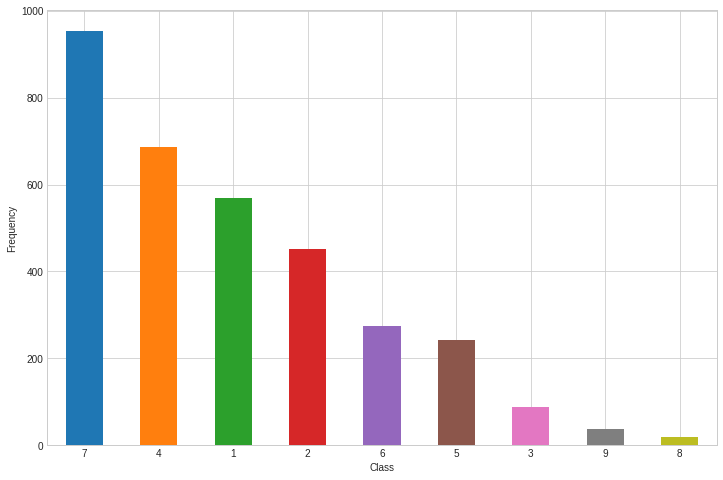

In [30]:
ax = train_df['Class'].value_counts().plot(kind="bar", rot=0, figsize = (12, 8))
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

#### We can see that classes are not equally distributed and that we have a lot of class 7 cases in training data

### Frequency of Varitations in training set

In [9]:
freq_train = train_df['Variation'].value_counts()
freq_train.count()

2996

Text(0,0.5,'Frequency')

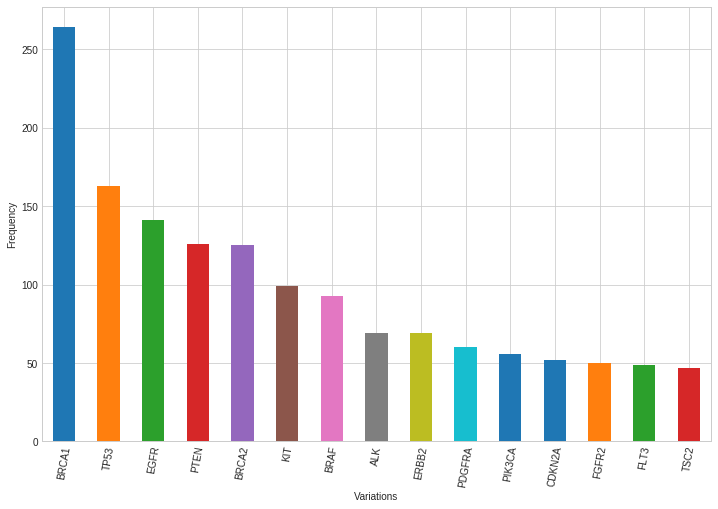

In [26]:
ax = freq_train.head(15).plot(kind = 'bar', rot = 80, figsize = (12, 8))
ax.set_xlabel('Variations')
ax.set_ylabel('Frequency')

#### Out of 3321 observations, there are 2996 unique variations which means there is not enough training data

### Frequency of variations in test set

In [11]:
freq_test = test_df['Variation'].value_counts()
freq_test.count()

5628

Text(0,0.5,'Frequency')

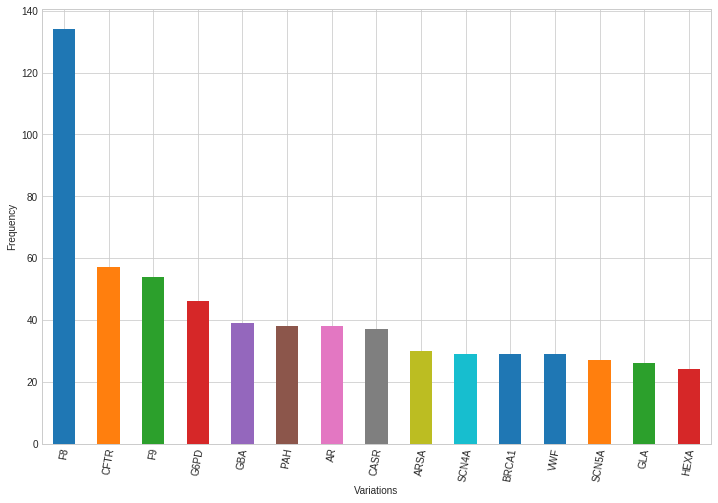

In [27]:
ax = freq_test.head(15).plot(kind = 'bar', rot = 80, figsize = (12, 8))
ax.set_xlabel('Variations')
ax.set_ylabel('Frequency')

#### Out of 5668 test observations, 5628 variations are unique. This means there are more unique variations in the test set which were not present in the training set.

### Frequency of genes in training set

In [13]:
freq_train = train_df['Gene'].value_counts()
freq_train.count()

264

Text(0.5,0,'Frequency')

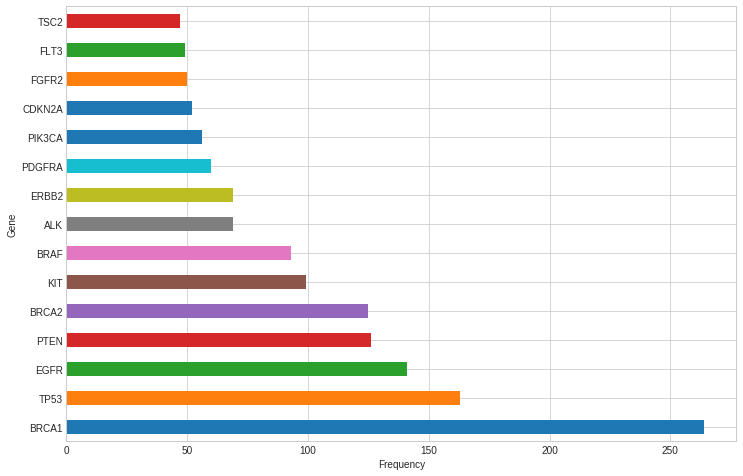

In [29]:
ax = freq_train.head(15).plot(kind = 'barh', rot = 0, figsize = (12, 8))
ax.set_ylabel('Gene')
ax.set_xlabel('Frequency')

In [16]:
freq_test = test_df['Gene'].value_counts()
freq_test.count()

1397

Text(0.5,0,'Frequency')

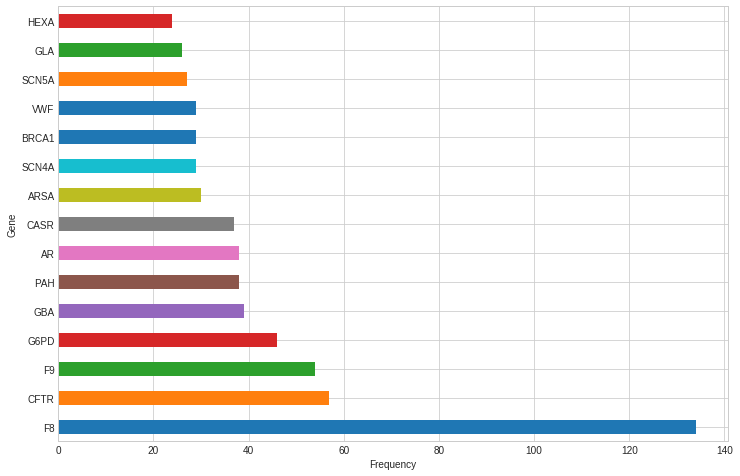

In [28]:
ax = freq_test.head(15).plot(kind = 'barh', rot = 0, figsize = (12, 8))
ax.set_ylabel('Gene')
ax.set_xlabel('Frequency')

#### We can clearly see that since there are more observations in the test set and the observations have uneven frequency distributions, to improve accuracy of the classifier, the text analysis will be crucial